In [8]:
from deepview.datasets.iterators import TFObjectDetectionIterator
from deepview.datasets.readers import TFPolarsDetectionReader

In [9]:
import yaml
with open("playingcards/dataset.yaml", 'r') as fp:
    true_order_classes = yaml.safe_load(fp).get('classes')

In [10]:
reader = TFPolarsDetectionReader(
    inputs = "playingcards-polars/validate/images_*.arrow",
    annotations = "playingcards-polars/validate/boxes_*.arrow",
    classes=["nine", "ace"] # to show only 2 classes, 
)

In [31]:
iterator = TFObjectDetectionIterator(
    from_config="playingcards/dataset.yaml",
    shape=(460, 1080, 3),
).get_train_iterator()

In [37]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

colors = np.array([
    [180, 0, 0], # ace red
    [0, 166, 76], # nine green
    [178, 179, 0],
    [2, 1, 181],
    [127, 96, 166],
    [3, 152, 133],
    [121, 121, 121],
    [76, 0, 0],
    [240, 0, 0],
    [107, 123, 61],
    [245, 185, 0],
    [94, 78, 127],
    [202, 2, 202],
    [105, 153, 199],
    [252, 155, 209],
    [53, 76, 32],
    [146, 76, 17],
    [0, 219, 99],
    [142, 206, 70],
    [2, 71, 128]    
], np.uint8)

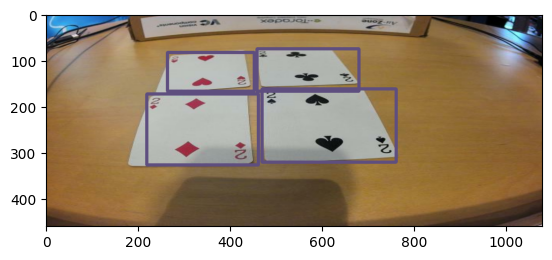

In [44]:
for i, instance in enumerate(iterator):
    if i < 5:
        continue

    image = instance[0].numpy().astype(np.uint8)
    boxes = instance[1].numpy()
    
    H, W, _ = image.shape

    for xc, yc, w, h, l in boxes:
        x1 = int((xc - w * 0.5) * W)
        x2 = int((xc + w * 0.5) * W)
        
        y1 = int((yc - h *0.5) * H)
        y2 = int((yc + h *0.5) * H)
        color = colors[int(l)].tolist()
            
        cv2.rectangle(image, (x1, y1), (x2, y2), color, 5)
    plt.imshow(image)
    break
    

In [ ]:
classes = [
    'ace',
    'king',
    'eight',
    'jack',
    'four',
    'three',
    'ten',
    'queen',
    'six',
    'five',
    'nine',
    'two',
    'seven',  
]
print(classes)
for i, instance in enumerate(iterator.iterator()):
    images = instance[0].numpy().astype(np.uint8)
    boxes = instance[1]
    
    for b in boxes:
        print(b, classes[int(b[-1])])
    plt.imshow(images)
    break